In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
# Urllib package is the URL handling module for python.
from urllib.request import urlopen
from datetime import datetime
from bs4 import BeautifulSoup
import squarify
import scipy.stats
import re

country = input('country : ')
city = input('City : ')
url = f"https://www.timeanddate.com/weather/{country}/{city}/ext"
page = urlopen(url)

soup = BeautifulSoup(page, 'lxml')
text = soup.get_text()
# print(soup.prettify())
day_str = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
drum = soup.find_all('table', {'class': 'zebra tb-wt fw va-m tb-hover'}, id='wt-ext')
store = []
data = []
data1 = []
# print(drum)
for i in drum:
    children = i.findChildren('td', recursive=True)
    # children1 = i.findChildren('td', {'class': 'small'}, recursive=True)

    for j in children:
        child = j.text
        # print(child)
        if child.isalnum():  # isalnum()
            data.append(child)
        else:
            data1.append(child)

# print(data1)
tem_f = []
exc = []
tem_fm = []
for i in data1:
    if len(i) >= 6 or i == '' or i == '-' or i == '↑':
        tem_f.append(i)
    else:
        exc.append(i)

for y in data1:
    if len(y) >= 6 and y[-1] == 'h':
        tem_fm.append(y)

clean = []
destroy = []
for j in exc:
    if j[0].isalpha():
        destroy.append(j)
    else:
        clean.append(j)

# print(clean)
# print(destroy)

Humidity = []
wind = []
high_low = []
for k in clean:
    if len(k) <= 3:
        Humidity.append(k)

# print(Humidity)
# print(high_low)

temp = []
for h in tem_f:
    if len(h) > 7 and h[-1] == 'C':
        temp.append(h)

# print(temp)

# c = Humidity[::2]

# print(c)

string = []
for i in temp:
    s = i.split()
    string.append(s)

# print(string)

temp_h = []
for i in string:
    a = i[0]
    temp_h.append(a)

# print(temp_h)

low_t = []
for i in string:
    l = i[2]
    low_t.append(l)

a = len(day_str)
avg_temp = []
for o in range(0, a):
    if int(temp_h[o])!=0 and int(low_t[o])!=0:
        A = (int(temp_h[o]) + int(low_t[o]))/2
        avg_temp.append(round(A))
        o += 1
    else:
        a = int(temp_h[o])+int(low_t[o])
        avg_temp.append(a)

print(avg_temp)
humidity = []
for t in Humidity:
    d = int(re.search(r'\d+', t).group())
    humidity.append(d)

# print(humidity)
c = humidity[::2]
# print(low_t)
#
for e in tem_fm:
    b = e.split()
    s = b[0]
    wind.append(s)

print(wind)
#
field = ['Day', 'High Temp', 'Low Temp', 'Humidity', 'WindSpeed', "Avg Temp"]
b = len(day_str)
i = 0
for i in range(0, b):
    a = {"Day": f"{day_str[i]}", "High Temp": f"{temp_h[i]}", "Low Temp": f"{low_t[i]}",
         "Humidity": f"{c[i]}", "WindSpeed": f"{wind[i]}", "Avg Temp": f"{avg_temp[i]}"}
    store.append(a)
    i += 1


# print(store)

with open('sample.csv', 'w') as sam:
    writer = csv.DictWriter(sam, fieldnames=field)
    writer.writeheader()
    writer.writerows(store)


country : india
City : shimla
[14, 14, 15, 15, 14, 14, 14, 14, 17, 17, 18, 18, 18, 18, 18]
['9', '8', '9', '9', '10', '10', '9', '9', '9', '7', '5', '5', '6', '5', '4']


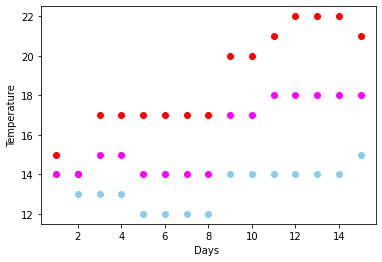

In [2]:
df = pd.read_csv("sample.csv")
u = df["Avg Temp"]
v = df["Day"]
w = df["High Temp"]
x = df['Low Temp']
y = df['Humidity']
z = df['WindSpeed']
plt.xlabel('Days ')
plt.ylabel('Temperature')
plt.scatter(v, w, color='red')
plt.scatter(v, x, color='skyblue')
plt.scatter(v, u, color='magenta')
plt.show()


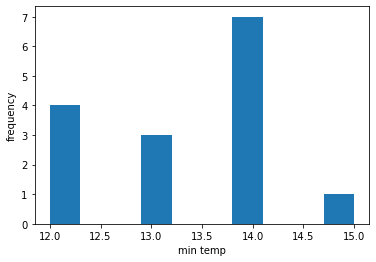

In [3]:
plt.hist(x )
plt.xlabel('min temp')
# min temperature
plt.ylabel('frequency')
plt.show()

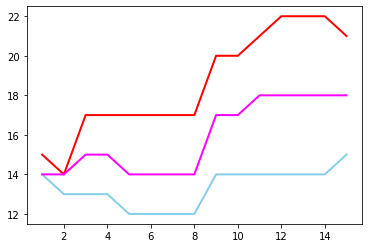

In [4]:
plt.plot(v, w, color='red', linewidth=2.0)
plt.plot(v, x, color='skyblue', linewidth=2.0)
plt.plot(v, u, color='magenta', linewidth=2.0)

plt.show()

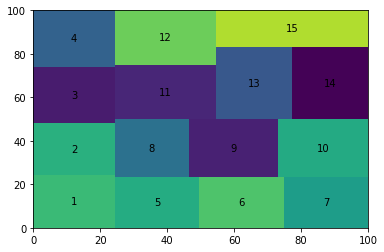

In [5]:
squarify.plot(u, label=day_str)
plt.show()

In [6]:
df.columns

Index(['Day', 'High Temp', 'Low Temp', 'Humidity', 'WindSpeed', 'Avg Temp'], dtype='object')

In [7]:
df.head()

,Day,High Temp,Low Temp,Humidity,WindSpeed,Avg Temp
0,1,15,14,91,9,14
1,2,14,13,95,8,14
2,3,17,13,75,9,15
3,4,17,13,69,9,15
4,5,17,12,72,10,14


In [8]:
df.tail()

,Day,High Temp,Low Temp,Humidity,WindSpeed,Avg Temp
10,11,21,14,48,5,18
11,12,22,14,55,5,18
12,13,22,14,64,6,18
13,14,22,14,58,5,18
14,15,21,15,69,4,18


<AxesSubplot:xlabel='Avg Temp', ylabel='Humidity'>

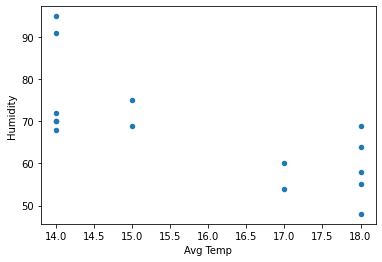

In [9]:
df.plot(x='Avg Temp', y='Humidity', kind="scatter")

C:\Users\Piyush\AppData\Local\Temp/ipykernel_7100/2636243383.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(random_dists,rotation=45, fontsize=12)


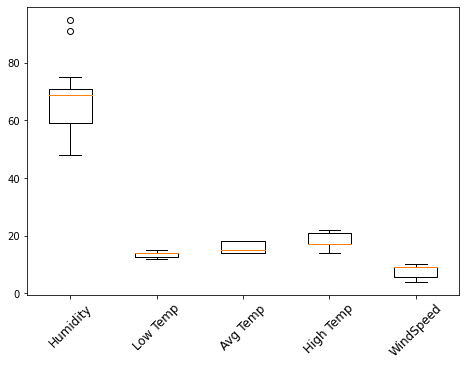

In [10]:
random_dists = ['Humidity', 'Low Temp', 'Avg Temp', 'High Temp',
                'WindSpeed']
data = [y, x, u, w, z]
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0.1, 0.1, 1, 1])
# Create the boxplot
ax.set_xticklabels(random_dists,rotation=45, fontsize=12)
bp = ax.boxplot(data)
plt.show()

In [11]:
from scipy.stats import pearsonr
list1 = df['High Temp']
list2 = df['Low Temp']
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.631


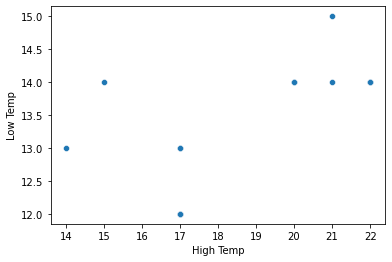

In [12]:
sns.scatterplot(x='High Temp',y='Low Temp',data = df);

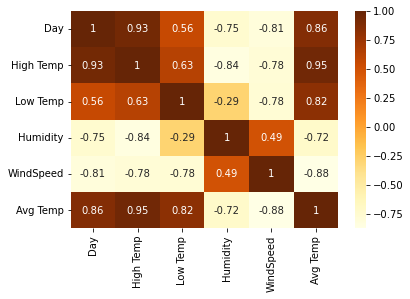

In [13]:
sns.heatmap(df.corr(),cmap="YlOrBr",annot=True);

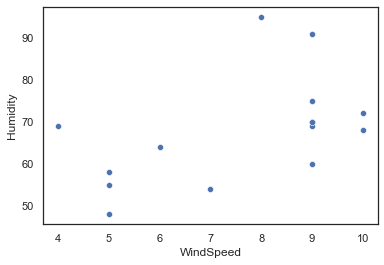

In [14]:
sns.set_theme(style="white")
sns.scatterplot(x="WindSpeed", y="Humidity",data=df);